<a href="https://colab.research.google.com/github/Raizel820/Raizel820-Capstone_Project_Machine_Learning/blob/master/Data_Cleaning_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
plt.style.use('default')
# mount Google Drive
from os.path import expanduser
gd_path=join(expanduser("~"),'gd')
if not os.path.isdir(gd_path):
    try:
        # load Google Drive
        from google.colab import drive,files
        drive.mount('/drive')
        sp.call('ln -s /drive/My\ Drive '+gd_path, shell=True)
    except:
        print('unable to find Google Drive Folder')
os.chdir(gd_path+'/MachineLearning/car_data')
os.listdir('.')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


['craigslistVehicles_full.csv', 'cars_cleaned.csv']

The dataset is taken from https://www.kaggle.com/austinreese/craigslist-carstrucks-data#craigslistVehicles.csv

In [2]:
df= pd.read_csv('craigslistVehicles_full.csv')
df.head()

,url,city,city_url,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,desc,lat,long
0,https://abilene.craigslist.org/cto/d/aspermont...,"abilene, TX",https://abilene.craigslist.org,9000,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,217743.0,clean,automatic,1GFNC26099R211276,rwd,full-size,SUV,white,https://images.craigslist.org/00909_5P6f1E6zHl...,2WD 1/2 ton\nLeather Captains Chairs\nIn good ...,33.130100,-100.234400
1,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,31999,2012.0,ram,2500,NaN,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_24XW8uhLYP...,www.GETADIESEL.com\n2012 RAM 2500 SLT 4X4 MEGA...,30.648368,-97.862949
2,https://abilene.craigslist.org/ctd/d/liberty-h...,"abilene, TX",https://abilene.craigslist.org,16990,2003.0,ram,3500,NaN,NaN,diesel,NaN,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_H1UKTJ4sTI...,www.GETADIESEL.com\n2003 DODGE RAM 3500 LARAMI...,30.648516,-97.862434
3,https://abilene.craigslist.org/cto/d/merkel-20...,"abilene, TX",https://abilene.craigslist.org,6000,2002.0,gmc,sierra 1500,good,8 cylinders,gas,195000.0,clean,automatic,NaN,4wd,NaN,pickup,white,https://images.craigslist.org/00M0M_2wKzc7dKLU...,2002 GMC Sierra Extended Cab Truck For Sale! R...,32.444400,-99.992400
4,https://abilene.craigslist.org/cto/d/breckenri...,"abilene, TX",https://abilene.craigslist.org,37000,2012.0,chevrolet,3500,excellent,8 cylinders,diesel,178000.0,clean,automatic,NaN,4wd,full-size,pickup,silver,https://images.craigslist.org/00r0r_eW1YWlKfCG...,"2012 Chevrolet 3500 178k miles, runs and drive...",32.781689,-98.942248


In [0]:
df.shape

(550313, 22)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550313 entries, 0 to 550312
Data columns (total 22 columns):
url             550313 non-null object
city            550313 non-null object
city_url        550313 non-null object
price           550313 non-null int64
year            548826 non-null float64
manufacturer    523398 non-null object
make            540636 non-null object
condition       300239 non-null object
cylinders       331316 non-null object
fuel            545572 non-null object
odometer        439513 non-null float64
title_status    546289 non-null object
transmission    546258 non-null object
VIN             311075 non-null object
drive           384475 non-null object
size            184057 non-null object
type            391134 non-null object
paint_color     370292 non-null object
image_url       550287 non-null object
desc            550283 non-null object
lat             538523 non-null float64
long            538523 non-null float64
dtypes: float64(4), int64(1)

In [0]:
df= df.drop(columns=['url','image_url', 'lat', 'long', 'city_url', 'desc', 'city', 'VIN'], axis=1)

In [0]:
list(df)

['price',
 'year',
 'manufacturer',
 'make',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [0]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,36625600,66.554
condition,25007400,45.442
cylinders,21899700,39.795
paint_color,18002100,32.712
drive,16583800,30.135
type,15917900,28.925
odometer,11080000,20.134
manufacturer,2691500,4.891
make,967700,1.758
fuel,474100,0.862


Let's eliminate extreme values from price column

In [0]:
df[df.price == 0].shape

(48708, 14)

In [0]:
df[df.price > 100000].shape

(580, 14)

In [0]:
df[df.price < 750].shape

(61726, 14)

In [0]:
df=df[(df.price < 100000) & (df.price >= 750 )]
df.shape

(488003, 14)

Odometers higher than 300k and lower than 10, and models earlier than 1985 may not be good observations for a robust prediction:

In [0]:
df[df.odometer < 1000].shape

(8113, 14)

In [0]:
df[df.odometer < 1000].sample(20)

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
66484,27000,2016.0,ford,f-150 lariat automatic,NaN,NaN,gas,0.0,clean,automatic,rwd,NaN,pickup,brown
388446,98850,2020.0,NaN,INTERNATIONAL MV MOVING VAN,new,6 cylinders,diesel,282.0,clean,automatic,rwd,NaN,truck,white
46659,2500,2001.0,ford,focus,NaN,NaN,gas,106.0,clean,manual,fwd,NaN,coupe,blue
225724,7000,1957.0,chevrolet,apache,good,8 cylinders,gas,1.0,clean,manual,4wd,mid-size,pickup,red
6515,28900,2016.0,ford,mustang gt coupe 2d,good,8 cylinders,gas,779.0,clean,automatic,rwd,NaN,coupe,red
44373,7500,2009.0,bmw,x5,good,8 cylinders,gas,145.0,clean,automatic,NaN,NaN,NaN,NaN
437848,6600,1991.0,toyota,mr2 turbo,excellent,4 cylinders,gas,242.0,clean,manual,rwd,NaN,NaN,black
462798,11495,2013.0,dodge,charger,NaN,NaN,gas,1.0,clean,automatic,rwd,NaN,sedan,NaN
26887,32314,2019.0,mazda,miata rf club,NaN,4 cylinders,gas,3.0,clean,automatic,rwd,NaN,coupe,NaN
383334,16500,2019.0,honda,hr-v,like new,4 cylinders,gas,350.0,rebuilt,automatic,4wd,NaN,SUV,grey


In [0]:
df[df.odometer >300000].shape

(3066, 14)

In [0]:
df=df[(df.odometer < 300000) & (df.odometer > 1000)]
df=df[df.year>1985]
df.shape

(375332, 14)

In [0]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23864700,63.583
condition,15331600,40.848
cylinders,12797900,34.098
paint_color,9108700,24.268
drive,8094900,21.567
type,7308300,19.472
manufacturer,1138100,3.032
make,375000,0.999
fuel,347800,0.927
title_status,328100,0.874


Now, it's time to fill some missing data in a meaningful way.

##### Dealing with missing 'condition' values


In [0]:
df['condition'].isnull().sum()

153316

In [0]:
df.loc[(df['year'] >= 2017)]['condition'].isnull().sum()

24000

In [0]:
df.condition.value_counts()

excellent    107483
good          84178
like new      21873
fair           7387
new             625
salvage         470
Name: condition, dtype: int64

###### I will label all cars:
##### after 2019 as "new"
##### 2017-2019 as "like new"


In [0]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')
df.loc[df.year>=2017, 'condition'] = df.loc[df.year>=2017, 'condition'].fillna('like new')

In [0]:
df.condition.value_counts()

excellent    107483
good          84178
like new      43050
fair           7387
new            3448
salvage         470
Name: condition, dtype: int64

##### I will assume that milage of the car affects it's condition. Therefore, I will fill missing values depending on odometer.

In [0]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [0]:
print('Like new average odometer:', round( like_new_odo_mean,2))
print('Excellent average odometer:', round( excellent_odo_mean,2))
print('Good average odometer:', round( good_odo_mean,2))
print('Fair average odometer:', round( fair_odo_mean,2))
print('Salvage average odometer:', round( salvage_odo_mean,2))


Like new average odometer: 56933.98
Excellent average odometer: 107756.25
Good average odometer: 119964.83
Fair average odometer: 172456.97
Salvage average odometer: 119788.47


In [0]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].value_counts()

like new     27612
excellent    18862
good         16609
new           3130
fair           152
salvage        111
Name: condition, dtype: int64

In [0]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > excellent_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > excellent_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

In [0]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23864700,63.583
cylinders,12797900,34.098
paint_color,9108700,24.268
drive,8094900,21.567
type,7308300,19.472
manufacturer,1138100,3.032
make,375000,0.999
fuel,347800,0.927
title_status,328100,0.874
transmission,321800,0.857


#### Dealing with missing 'cylinders' values

In [0]:
df.cylinders.value_counts()

6 cylinders     90977
4 cylinders     76361
8 cylinders     74885
5 cylinders      2423
10 cylinders     1291
other             917
3 cylinders       355
12 cylinders      144
Name: cylinders, dtype: int64

With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time point. In other words, ffill propagates last valid observation forward to next valid. Therefore, **rest of the missing values will be filled with 'ffill' method.**

In [0]:
df['transmission'] = df['transmission'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')
df['title_status'] = df['title_status'].fillna(method='ffill')
df['fuel'] = df['fuel'].fillna(method='ffill')
df['size'] = df['size'].fillna(method='ffill')
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['manufacturer'] = df['manufacturer'].fillna(method='ffill')
df['make'] = df['make'].fillna(method='ffill')
df['type'] = df['type'].fillna(method='ffill')

In [0]:
df.isnull().sum()

price           0
year            0
manufacturer    0
make            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [0]:
null_values=df.isnull().sum()
null_values=pd.DataFrame(null_values,columns=['null'])
j=1
sum_tot=len(df)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
price,0,0.0
year,0,0.0
manufacturer,0,0.0
make,0,0.0
condition,0,0.0
cylinders,0,0.0
fuel,0,0.0
odometer,0,0.0
title_status,0,0.0
transmission,0,0.0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375332 entries, 0 to 550312
Data columns (total 14 columns):
price           375332 non-null int64
year            375332 non-null float64
manufacturer    375332 non-null object
make            375332 non-null object
condition       375332 non-null object
cylinders       375332 non-null object
fuel            375332 non-null object
odometer        375332 non-null float64
title_status    375332 non-null object
transmission    375332 non-null object
drive           375332 non-null object
size            375332 non-null object
type            375332 non-null object
paint_color     375332 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 43.0+ MB


In [0]:
df.shape

(375332, 14)

By looking at above 'type' and 'drive' values, we can see that there is no heavily dominant sub category. Therefore, after this point, all rows that has a missing value will be deleted.

# Exploring the data

In [0]:
df.sample(40)

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
243303,7897,2012.0,honda,accord,excellent,4 cylinders,gas,167000.0,clean,automatic,fwd,mid-size,sedan,white
464061,6699,2010.0,bmw,528i,excellent,6 cylinders,gas,116000.0,clean,automatic,4wd,full-size,sedan,blue
203706,2950,2010.0,chrysler,sebring touring,excellent,4 cylinders,gas,202000.0,clean,automatic,fwd,mid-size,sedan,black
11384,5595,2008.0,chrysler,town & country,good,6 cylinders,gas,136498.0,clean,automatic,fwd,full-size,van,blue
246093,1800,2002.0,ford,taurus,excellent,6 cylinders,gas,76700.0,clean,automatic,fwd,mid-size,SUV,red
500457,4500,2007.0,mazda,miata,good,4 cylinders,gas,102500.0,salvage,manual,rwd,compact,hatchback,red
36085,29995,2017.0,chevrolet,silverado lt crew cab,excellent,8 cylinders,gas,81406.0,clean,automatic,4wd,full-size,pickup,white
345164,27991,2007.0,ford,mustang,like new,8 cylinders,gas,32288.0,clean,manual,rwd,compact,convertible,black
276670,5275,2010.0,kia,forte koup,excellent,4 cylinders,gas,114587.0,clean,manual,fwd,mid-size,coupe,silver
328190,13995,2017.0,toyota,corolla le,good,4 cylinders,gas,96586.0,clean,automatic,fwd,full-size,sedan,white


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

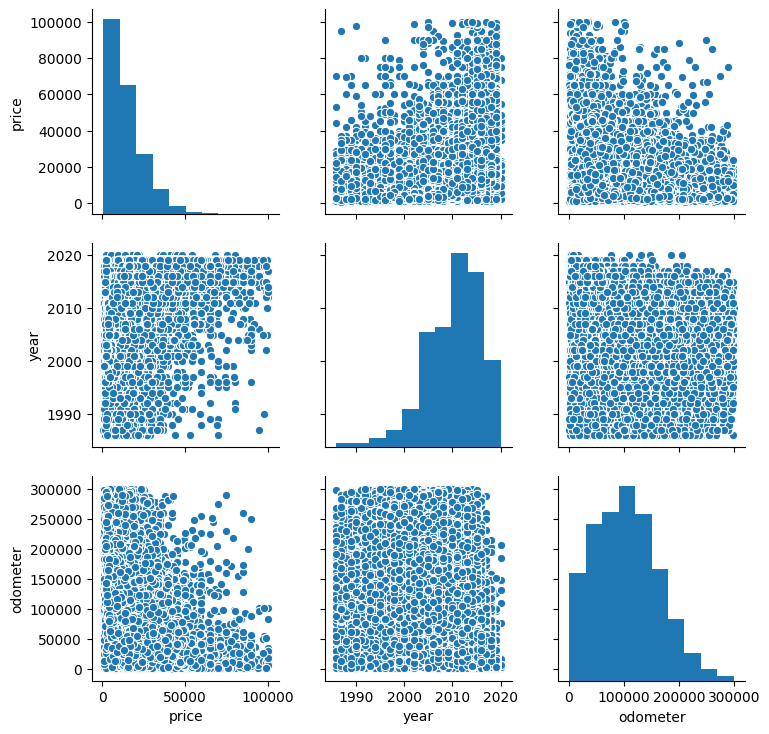

In [0]:
sns.pairplot(df)

In [0]:
df.set_index(['price', 'year']).sample(5)

,,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
price,year,,,,,,,,,,,,
31824,2016.0,toyota,highlander limited,good,6 cylinders,other,28143.0,clean,automatic,fwd,compact,other,red
14995,2008.0,ford,f150 supercrew king ranch,excellent,8 cylinders,gas,130000.0,clean,automatic,4wd,full-size,truck,white
12500,2011.0,ford,f-350,salvage,8 cylinders,diesel,170073.0,clean,automatic,4wd,full-size,pickup,brown
3700,2008.0,pontiac,g6,excellent,4 cylinders,gas,123000.0,clean,automatic,fwd,mid-size,sedan,grey
11950,2012.0,chevrolet,silverado 1500 lt,salvage,8 cylinders,gas,134497.0,rebuilt,automatic,4wd,mid-size,truck,blue


In [0]:
df.sort_values('year').sample(10)

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
293459,24400,2015.0,chevrolet,camaro ss convertible,good,8 cylinders,gas,47611.0,clean,automatic,rwd,compact,other,white
135364,15995,2016.0,chevrolet,malibu,like new,8 cylinders,gas,20034.0,clean,automatic,4wd,compact,sedan,black
128088,5200,2006.0,toyota,tundra,fair,8 cylinders,gas,242000.0,clean,automatic,4wd,full-size,truck,silver
204654,6900,2008.0,jeep,liberty limited,good,6 cylinders,gas,161000.0,clean,automatic,4wd,compact,coupe,orange
413959,21000,2014.0,mercedes-benz,m-class,excellent,4 cylinders,gas,78329.0,clean,automatic,4wd,compact,SUV,white
258151,15350,2010.0,ford,mustang gt premium,like new,8 cylinders,gas,73000.0,clean,automatic,rwd,full-size,coupe,red
485941,24532,2013.0,chevrolet,silverado 2500 hd,like new,8 cylinders,gas,64933.0,clean,automatic,4wd,full-size,pickup,white
231069,5950,2008.0,mercury,grand marquis,excellent,8 cylinders,other,84636.0,clean,automatic,4wd,full-size,sedan,green
253139,17950,2014.0,ford,expedition xl,excellent,8 cylinders,gas,69000.0,clean,automatic,4wd,full-size,SUV,blue
235857,5500,2004.0,gmc,savana g3500,salvage,6 cylinders,gas,130000.0,rebuilt,automatic,rwd,full-size,pickup,white


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375332 entries, 0 to 550312
Data columns (total 14 columns):
price           375332 non-null int64
year            375332 non-null float64
manufacturer    375332 non-null object
make            375332 non-null object
condition       375332 non-null object
cylinders       375332 non-null object
fuel            375332 non-null object
odometer        375332 non-null float64
title_status    375332 non-null object
transmission    375332 non-null object
drive           375332 non-null object
size            375332 non-null object
type            375332 non-null object
paint_color     375332 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 43.0+ MB


In [0]:
df.drive.value_counts()

4wd    175113
fwd    136163
rwd     69686
Name: drive, dtype: int64

In [0]:
list(df)

['price',
 'year',
 'manufacturer',
 'make',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color']

In [0]:
df.to_csv('cars_cleaned.csv', index=False)